In [132]:
from databaseaccessor import DfReader
import pandas as pd
from datetime import datetime,date
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
df_reader = DfReader(bucket="opt",config_path="../config.ini")

## Get Opt Data

<AxesSubplot:xlabel='_time'>

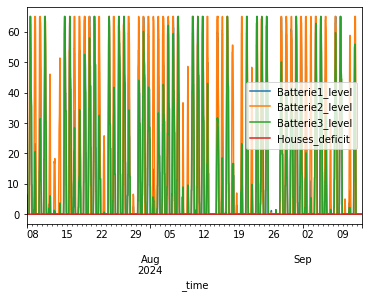

In [136]:
start_date = int(datetime(year = 2024,month = 7, day = 7).timestamp())
end_date = int(datetime(year = 2024, month = 9, day = 13).timestamp())


energy_meas = ["Batterie1_level","Batterie2_level","Batterie3_level","Houses_deficit"]

df_energy = df_reader.read(range_start=start_date,range_stop=end_date,measurement_name="energy_kWh",field_columns=energy_meas)
df_energy[energy_meas].plot()

In [137]:
power_meas = ["Batterie_1","Batterie_2","Batterie_3", "Houses", "Grid", "PV"]
df_power = df_reader.read(range_start=start_date,range_stop=end_date,measurement_name="power_kW",field_columns=power_meas)
df_power.head()

,_start,_stop,_measurement,Batterie_1,Batterie_2,Batterie_3,Grid,Houses,PV
_time,,,,,,,,,
2024-07-06 22:00:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,power_kW,0.000000,0.0,-18.034873,0.000000,17.264385,-0.770488
2024-07-06 22:15:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,power_kW,-16.581227,0.0,0.000000,0.000000,16.426247,-0.154980
2024-07-06 22:30:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,power_kW,-6.237055,0.0,0.000000,8.818406,14.654033,-0.401428
2024-07-06 22:45:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,power_kW,0.000000,0.0,0.000000,13.566377,13.441282,-0.125094
2024-07-06 23:00:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,power_kW,0.000000,0.0,0.000000,13.729819,12.443355,-1.286464


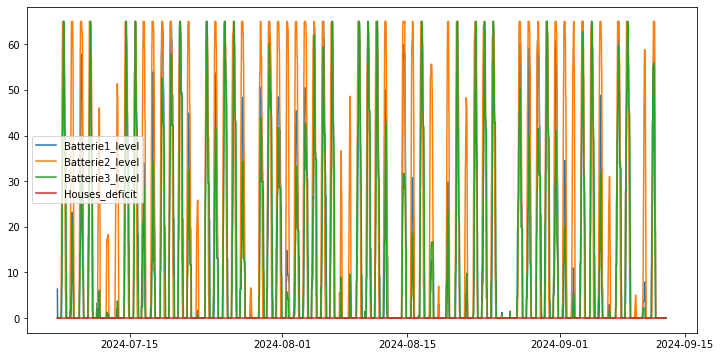

In [138]:
fig = plt.figure(figsize=(12,6))
for meas in energy_meas:
    plt.plot(df_energy.index,df_energy[meas] , label = meas)

plt.legend()
plt.show()

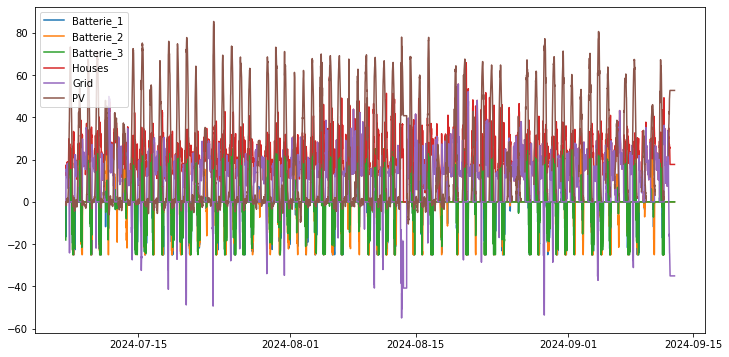

In [141]:
fig = plt.figure(figsize=(12,6))
for meas in power_meas:

    plt.plot(df_power.index,df_power[meas], label = meas)

plt.legend()
plt.show()

## Get Hist Data

In [142]:
df_reader_hist = DfReader(bucket = "hist", config_path="../config.ini")

In [314]:

percentage_hist = ["Batterie System 1", "Batterie System 2"]

df_percentage_hist = df_reader_hist.read(range_start=start_date,range_stop=end_date,measurement_name="percentage",field_columns=percentage_hist)

percentage_hist = ["Batterie System 3"]
df_percentage_hist_2 = df_reader_hist.read(range_start=start_date,range_stop=end_date,measurement_name="percentage",field_columns=percentage_hist)

df_percentage_hist["Batterie System 3"] = df_percentage_hist_2["Batterie System 3"]

percentage_hist = ["Batterie System 1", "Batterie System 2", "Batterie System 3"]
df_percentage_hist.head()

,_start,_stop,_measurement,Batterie System 1,Batterie System 2,Batterie System 3
_time,,,,,,
2024-07-06 22:04:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,percentage,2.0,2.0,0.0
2024-07-06 22:06:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,percentage,2.0,2.0,0.0
2024-07-06 22:19:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,percentage,2.0,2.0,0.0
2024-07-06 22:21:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,percentage,2.0,2.0,0.0
2024-07-06 22:34:00+00:00,2024-07-06 22:00:00+00:00,2024-09-12 22:00:00+00:00,percentage,2.0,2.0,0.0


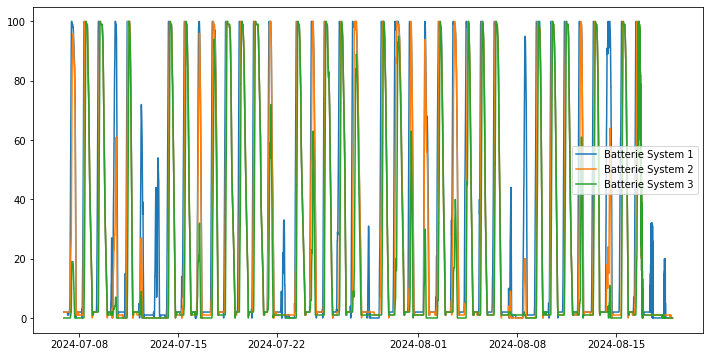

In [289]:
fig = plt.figure(figsize = (12,6))
for meas in percentage_hist:
    plt.plot(df_percentage_hist[meas],label = meas)

plt.legend()
plt.show()

In [313]:
power_hist = ["Batterie System 1 Batterieladung",
              "Batterie System 1 Batterieentladung",
              "Batterie System 2 Batterieladung",
              "Batterie System 2 Batterieentladung",
              "Batterie System 3 Batterieladung",
              "Batterie System 3 Batterieentladung",
              "Regelpunkt eBS Netzbezug",                 # is written wrong in DB
              "Regelpunkt eBS Netzeinspeisung",           # is written wrong in DB
              "PV-Anlage",
              "Haus 34",
              "Haus 36",
              "Haus 38"]

df_power_hist = pd.DataFrame()
for key in power_hist:

    df_new = df_reader_hist.read(range_start=start_date,range_stop=end_date,measurement_name="power_kW",field_columns=[key])
    df_power_hist[key] = df_new[key]
# df_power_hist = df_reader_hist.read(range_start=start_date,range_stop=end_date,measurement_name="power_kW",field_columns=power_hist)

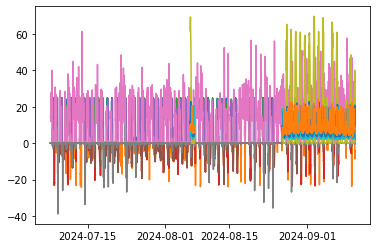

In [291]:
plt.plot(df_power_hist)
plt.show()

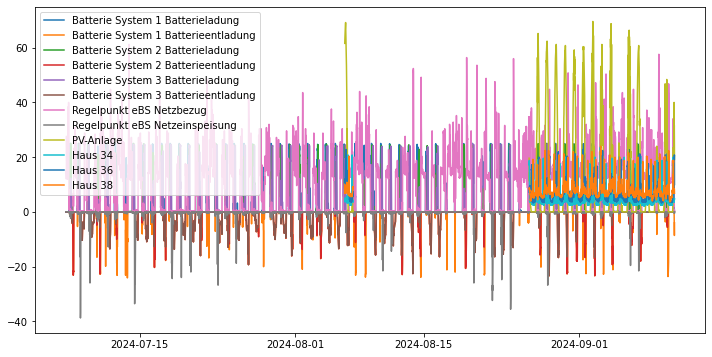

In [292]:
fig = plt.figure(figsize = (12,6))
for meas in power_hist:
    plt.plot(df_power_hist.index,df_power_hist[meas],label = meas)

plt.legend()
plt.show()

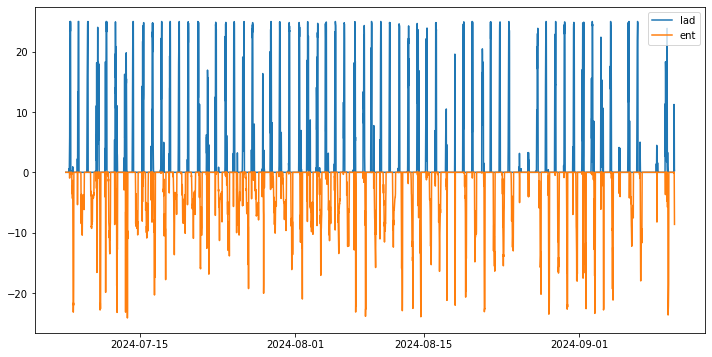

In [315]:
plt.figure(figsize=(12,6))
start_idx = 0
stop_idx = -1
plt.plot(df_power_hist.index[start_idx:stop_idx],df_power_hist["Batterie System 1 Batterieladung"][start_idx:stop_idx],label = "lad")
plt.plot(df_power_hist.index[start_idx:stop_idx],df_power_hist["Batterie System 1 Batterieentladung"][start_idx:stop_idx],label = "ent")
plt.legend()
plt.show()

## Perpare Hist DF

So hist and opt DF have same keys (and meaning of keys)

In [321]:
df_power_hist["Houses"] = df_power_hist["Haus 34"] + df_power_hist["Haus 36"] + df_power_hist["Haus 38"]

df_power_hist["Grid"] = df_power_hist["Regelpunkt eBS Netzbezug"] + df_power_hist["Regelpunkt eBS Netzeinspeisung"]

# charge and discharge power 
df_power_hist["Batterie_1"] = df_power_hist["Batterie System 1 Batterieladung"] + df_power_hist["Batterie System 1 Batterieentladung"]
df_power_hist["Batterie_2"] = df_power_hist["Batterie System 2 Batterieladung"] + df_power_hist["Batterie System 2 Batterieentladung"]
df_power_hist["Batterie_3"] = df_power_hist["Batterie System 3 Batterieladung"] + df_power_hist["Batterie System 3 Batterieentladung"]


In [325]:
# sadly does not work -> discharge is less than charge (losses)
# df_percentage_hist = df_percentage_hist.reindex(df_power_hist.index)
# df_percentage_hist["Batterie1"] = 100 * df_power_hist["Batterie_1"] / df_power_hist["Batterie_1"].max()
# df_percentage_hist["Batterie2"] = 100 * df_power_hist["Batterie_2"] / df_power_hist["Batterie_2"].max()
# df_percentage_hist["Batterie3"] = 100 * df_power_hist["Batterie_3"] / df_power_hist["Batterie_3"].max()

# not that usable -> only values till August (use power instead)
df_percentage_hist["Batterie_1"] = df_percentage_hist["Batterie System 1"]
df_percentage_hist["Batterie_2"] = df_percentage_hist["Batterie System 2"]
df_percentage_hist["Batterie_3"] = df_percentage_hist["Batterie System 2"]

# Create Percentage DF (for opt)
df_percentage = pd.DataFrame()
df_percentage.index = df_energy.index
df_percentage["Batterie_1"] = 100 * df_energy["Batterie1_level"] / df_energy["Batterie1_level"].max()
df_percentage["Batterie_2"] = 100 * df_energy["Batterie2_level"] / df_energy["Batterie2_level"].max()
df_percentage["Batterie_3"] = 100 * df_energy["Batterie3_level"] / df_energy["Batterie3_level"].max()

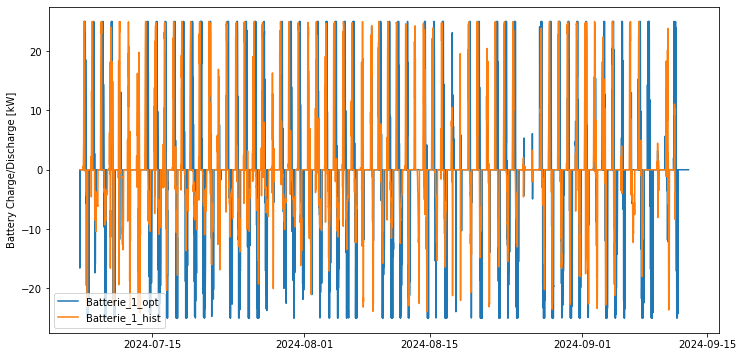

In [331]:
battery_meas = ["Batterie_1", "Batterie_2", "Batterie_3"]

start_date
fig = plt.figure(figsize=(12,6))
for col in battery_meas:

    if "1" in col:
        plt.plot(df_power[col], label=f"{col}_opt" )
        plt.plot(df_power_hist[col], label=f"{col}_hist" )

plt.ylabel("Battery Charge/Discharge [kW]")
plt.legend()
plt.show()

In [333]:
# # df_percentage_hist has missing values
# plt.figure(figsize=(12,6))
# start_idx = 0
# stop_idx = -1
# battery_key = "Batterie3"
# plt.title(f"Comparison OPT and HIST of {battery_key}")
# plt.plot(df_percentage.index[start_idx:stop_idx],df_percentage[battery_key][start_idx:stop_idx],label = "opt")
# plt.plot(df_percentage_hist.index[start_idx:stop_idx],df_percentage_hist[battery_key][start_idx:stop_idx],label = "hist")
# plt.legend()
# plt.xlabel("Date")
# plt.ylabel(f"Battery Level [%]")
# plt.show()

# Comparison Soll - IST

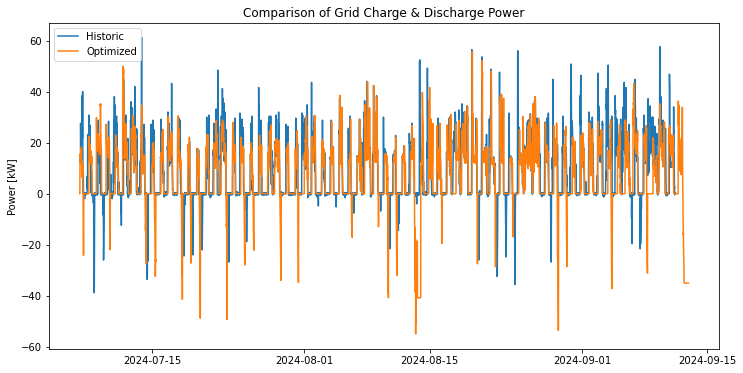

In [334]:
meas = "Grid"

start_idx = 0
stop_idx = -1

fig = plt.figure(figsize=(12,6))
plt.title(f"Comparison of {meas} Charge & Discharge Power")
plt.plot(df_power_hist.index[start_idx:stop_idx],df_power_hist[meas][start_idx:stop_idx],label = "Historic")
plt.plot(df_power.index[start_idx:stop_idx],df_power[meas][start_idx:stop_idx],label = "Optimized") 
plt.legend()
plt.ylabel(f"Power [kW]")
plt.show()

# PV Data

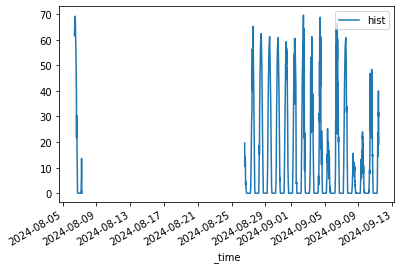

In [335]:
# historic PV Data is missing
df_power_hist["PV-Anlage"].plot(label = "hist")
#df_power["PV"].plot(label = "opt")
plt.legend()
plt.show()

# Analysis

PV Production Difference

In [49]:
df_power["PV"].mean() - df_power_hist["PV-Anlage"].mean()

19.078616847236415

Load Consumption Difference

In [163]:
df_power["Houses"].mean() - df_power_hist["Houses"].mean()

2.0120109583567363

Grid Import / Exmport Difference

In [336]:
df_power["Grid_import"] = df_power["Grid"]
df_power["Grid_export"] = df_power["Grid"]
df_power.loc[df_power["Grid_import"] < 0,["Grid_import"]] = 0
df_power.loc[df_power["Grid_export"] > 0, ["Grid_export"]] = 0


In [337]:
df_power_hist.columns

df_power_hist["Grid_import"] = df_power_hist["Regelpunkt eBS Netzbezug"]
df_power_hist["Grid_export"] = df_power_hist["Regelpunkt eBS Netzeinspeisung"]

In [338]:
diff_import = df_power["Grid_import"].mean() - df_power_hist["Grid_import"].mean()
diff_import

print(f"Improvement of average Grid Import: {diff_import:.2f} kW")

Improvement of average Grid Import: -1.88 kW


In [339]:
import numpy as np
max_import = np.max([df_power["Grid_import"].mean(), df_power_hist["Grid_import"].mean()])
relative_import = 100 * diff_import / max_import
print(f"Improvement of relative Grid Import: {relative_import:.1f} %")

Improvement of relative Grid Import: -19.8 %


In [340]:
diff_export = df_power["Grid_export"].mean() - df_power_hist["Grid_export"].mean()
diff_export

print(f"Reduction of average Grid Export: {diff_export:.2f} kW")

Reduction of average Grid Export: -0.73 kW


In [341]:
max_export = np.max([df_power["Grid_export"].mean() , df_power_hist["Grid_export"].mean()])
relative_export = 100 * diff_export / max_export
print(f"Reduction of relative Grid Export: {relative_export:.1f} %")

Reduction of relative Grid Export: 131.1 %


write to file:

In [361]:
results = {}
import json

results["Import_Improvement"] = f"{diff_import:.2f} kW"
results["Import_Improvement_relative"] = f"{relative_import:.2f} %"
results["Export_Reduction"] = f"{diff_export:.2f} kW"
results["Export_Reduction_relative"] = f"{relative_export:.2f} %"

with open(file="results.json",mode = "w+") as fp:
    json.dump(results,fp=fp, indent=4)

# Additional Data 
Get more data (for additional analysis)
- Weather

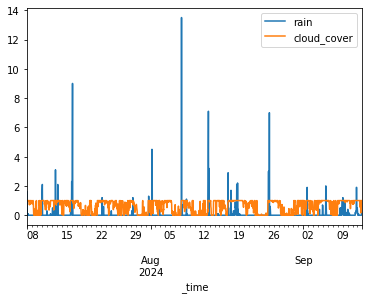

In [344]:
df_weather = DfReader(bucket = "weather", config_path="../config.ini")
percent_meas = ["cloud_cover"]      # of percent measurement
mm_meas = ["rain"]                  # of mm measurement

df_cloud = df_weather.read(range_start=start_date,range_stop=end_date,measurement_name="percent",field_columns=percent_meas)
df_mm = df_weather.read(range_start=start_date,range_stop=end_date,measurement_name="mm",field_columns=mm_meas)

df_weather = df_cloud.copy()
df_weather["rain"] = df_mm["rain"]

weather_meas = ["rain","cloud_cover"]
df_weather[weather_meas].plot()
plt.show()

# Select Interesting Days

C:\Users\tjwidmer\AppData\Local\Temp\ipykernel_9584\2584883747.py:4: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  plt.plot(df_weather.loc[start_date_interest:stop_date_interest][weather_meas])


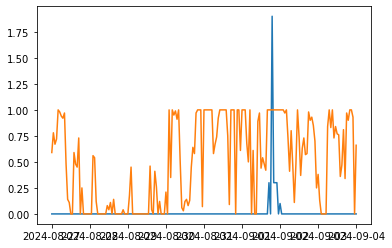

In [346]:
start_date_interest = datetime(2024,8,27,00,00)
stop_date_interest = datetime(2024,9,4,00,00)

plt.plot(df_weather.loc[start_date_interest:stop_date_interest][weather_meas])

In [352]:
df_power["Batterie_Total"] = df_power["Batterie_1"] + df_power["Batterie_2"] + df_power["Batterie_3"]

df_power_hist["Batterie_Total"] = df_power_hist["Batterie_1"] + df_power_hist["Batterie_2"] + df_power_hist["Batterie_3"]


In [349]:
# df_percentage_hist["Batterie_Total"].plot()

C:\Users\tjwidmer\AppData\Local\Temp\ipykernel_9584\1460151999.py:8: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax1.plot(df_power_hist.loc[start_date_interest:stop_date_interest, meas], label="Historic", color='C0')
C:\Users\tjwidmer\AppData\Local\Temp\ipykernel_9584\1460151999.py:9: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax1.plot(df_power.loc[start_date_interest:stop_date_interest, meas], label="Optimized", color='C1')
C:\Users\tjwidmer\AppData\Local\Temp\ipykernel_9584\1460151999.py:17: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax2.plot(df_power.loc[start_date_int

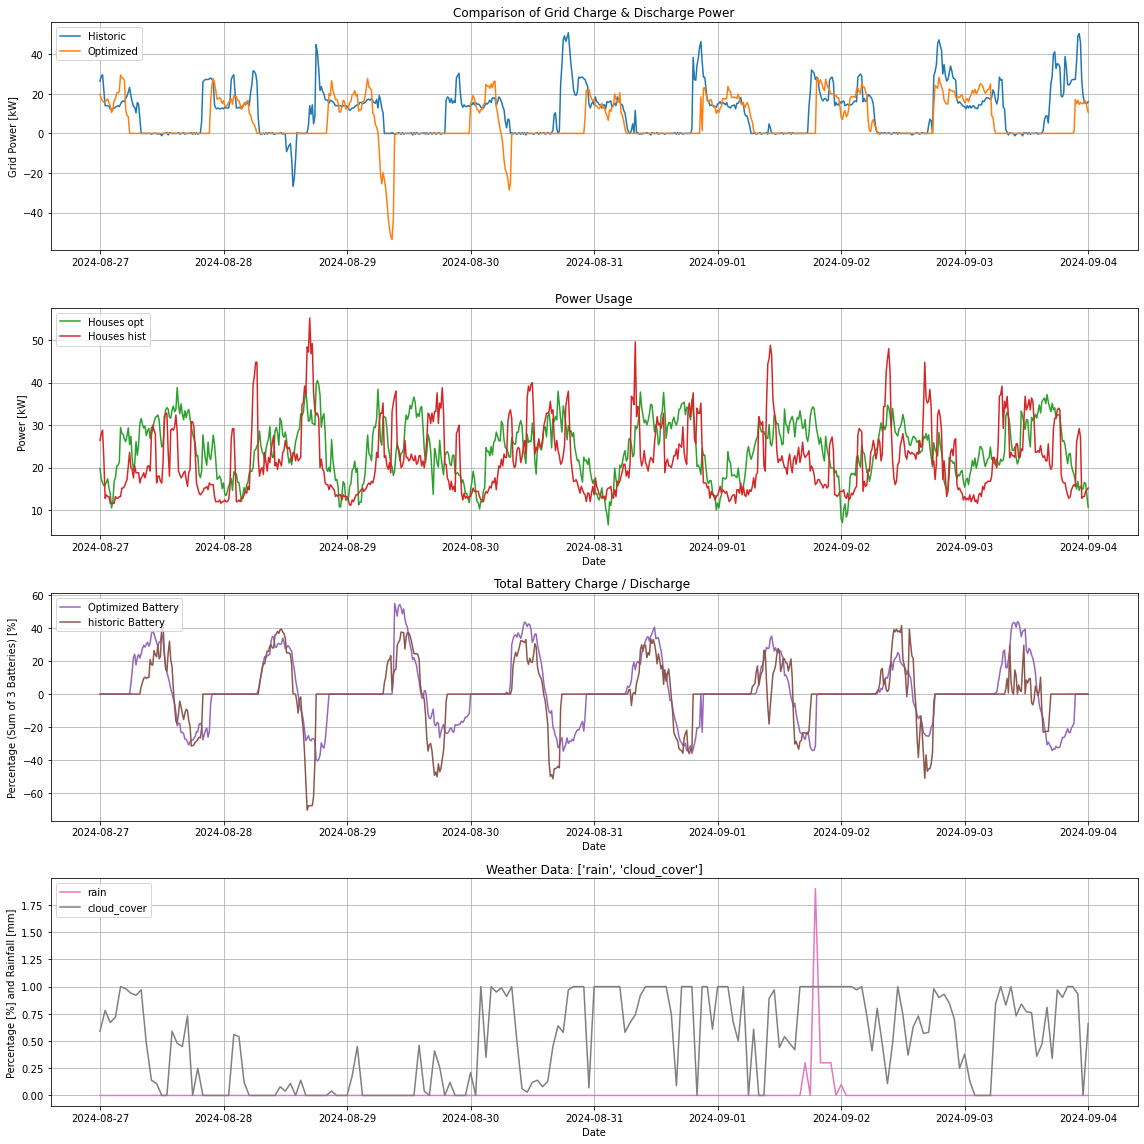

In [359]:
import matplotlib.pyplot as plt

meas = "Grid"
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16,16))

# First subplot: Comparison of df_power and df_power_hist
ax1.set_title(f"Comparison of {meas} Charge & Discharge Power")
ax1.plot(df_power_hist.loc[start_date_interest:stop_date_interest, meas], label="Historic", color='C0')
ax1.plot(df_power.loc[start_date_interest:stop_date_interest, meas], label="Optimized", color='C1')
ax1.set_ylabel(f"{meas} Power [kW]")
ax1.legend(loc="upper left")
ax1.grid(True)


# 2nd Plot: Consumption
ax2.set_title("Power Usage")
ax2.plot(df_power.loc[start_date_interest:stop_date_interest]["Houses"], label=f"Houses opt", color=f'C2')
ax2.plot(df_power_hist.loc[start_date_interest:stop_date_interest]["Houses"], label=f"Houses hist", color=f'C3')

ax2.set_ylabel(f"Power [kW]")
ax2.set_xlabel("Date")
ax2.legend(loc="upper left")
ax2.grid(True)

ax3.set_title("Total Battery Charge / Discharge ")
# for i,battery in enumerate(battery_columns):
#     ax3.plot(df_percentage.loc[start_date_interest:stop_date_interest][battery], label=f"{battery} opt", color=f'C{i}')
#     ax3.plot(df_percentage_hist.loc[start_date_interest:stop_date_interest][battery], label=f"{battery} hist", color=f'C{i}', linestyle = "--")
ax3.plot(df_power.loc[start_date_interest:stop_date_interest]["Batterie_Total"], label=f"Optimized Battery", color=f'C4')
ax3.plot(df_power_hist.loc[start_date_interest:stop_date_interest]["Batterie_Total"], label=f"historic Battery", color=f'C5')

ax3.set_ylabel(f"Percentage (Sum of 3 Batteries) [%]")
ax3.set_xlabel("Date")
ax3.legend(loc="upper left")
ax3.grid(True)


# Second subplot: Plot df_weather
ax4.set_title(f"Weather Data: {weather_meas}")
ax4.plot(df_weather.loc[start_date_interest:stop_date_interest][weather_meas[0]], label=weather_meas[0], color='C6')
ax4.plot(df_weather.loc[start_date_interest:stop_date_interest][weather_meas[1]], label=weather_meas[1], color='C7')
ax4.set_ylabel(f"Percentage [%] and Rainfall [mm]")
ax4.set_xlabel("Date")
ax4.legend(loc="upper left")
ax4.grid(True)


# Adjust layout for better spacing
plt.tight_layout()
plt.savefig(f"Performance_Optimizer.png")
plt.show()


## Difference in Battery usage

In [93]:
battery = "Batterie_1"
df_power.loc[df_power[battery]>0,[battery]] = 0

In [98]:
battery = "Batterie_1"
df_power[f"{battery}_charge"] = df_power[battery]
df_power.loc[df_power[f"{battery}_charge"]<0,[f"{battery}_charge"]] = 0

In [105]:
f"{battery}_charge" == "Batterie_1_charge"

True

In [104]:
"Batterie_1_charge"

'Batterie_1_charge'

<AxesSubplot:xlabel='_time'>

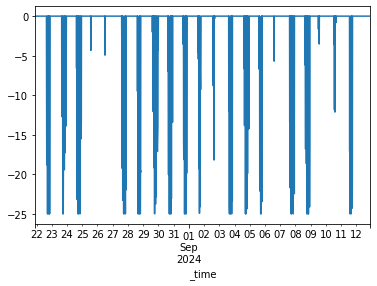

In [108]:
df_power[f"{battery}_charge"].plot()

In [109]:
# create charge and discharge columns
for battery in ["Batterie_1","Batterie_2","Batterie_3"]:
    
    df_power[f"{battery}_charge"] = df_power[battery]
    df_power.loc[df_power[f"{battery}_charge"]<0,[f"{battery}_charge"]] = 0

    df_power[f"{battery}_discharge"] = df_power[battery]
    df_power.loc[df_power[f"{battery}_discharge"]<0,[f"{battery}_discharge"]] = 0

    df_power_hist[f"{battery}_charge"] = df_power_hist[battery]
    df_power_hist.loc[df_power_hist[f"{battery}_charge"]<0,[f"{battery}_charge"]] = 0

    df_power_hist[f"{battery}_discharge"] = df_power_hist[battery]
    df_power_hist.loc[df_power_hist[f"{battery}_discharge"]<0,[f"{battery}_discharge"]] = 0

   

In [ ]:
# analyse charge and discharge columns
for battery in ["Batterie_1","Batterie_2","Batterie_3"]:
    diff_charge = df_power[f"{battery}_charge"].mean() - df_power_hist[f"{battery}_charge"].mean()

    diff_discharge = df_power[f"{battery}_discharge"].mean() - df_power_hist[f"{battery}_discharge"].mean()